In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
image = cv2.imread('Picture1.jpg')


In [47]:
image.shape

(265, 396, 3)

In [48]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

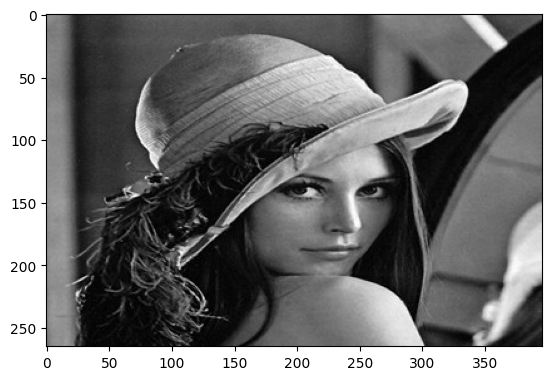

In [49]:
plt.imshow(rgb_image)

In [50]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


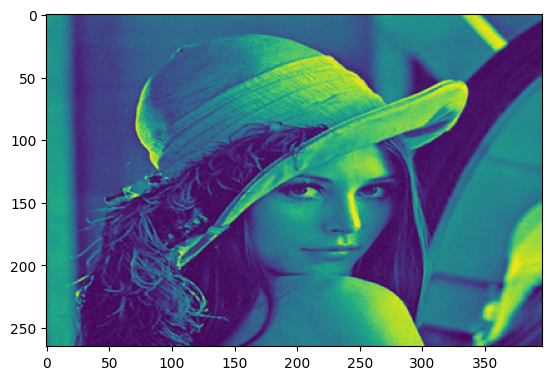

In [59]:
plt.imshow(gray_image)

In [52]:
threshold_value = 128
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

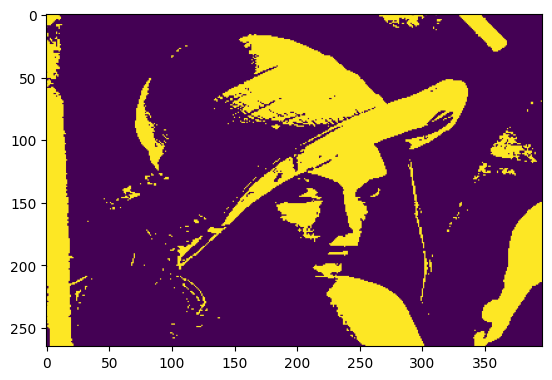

In [67]:
plt.imshow(binary_image)

In [54]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

In [55]:
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x).astype(np.float64)
prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y).astype(np.float64)
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)

In [56]:
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_image, -1, roberts_kernel_x).astype(np.float64)
roberts_y = cv2.filter2D(gray_image, -1, roberts_kernel_y).astype(np.float64)
roberts_edge = cv2.magnitude(roberts_x, roberts_y)

In [57]:
canny_edge = cv2.Canny(gray_image, 100, 200)


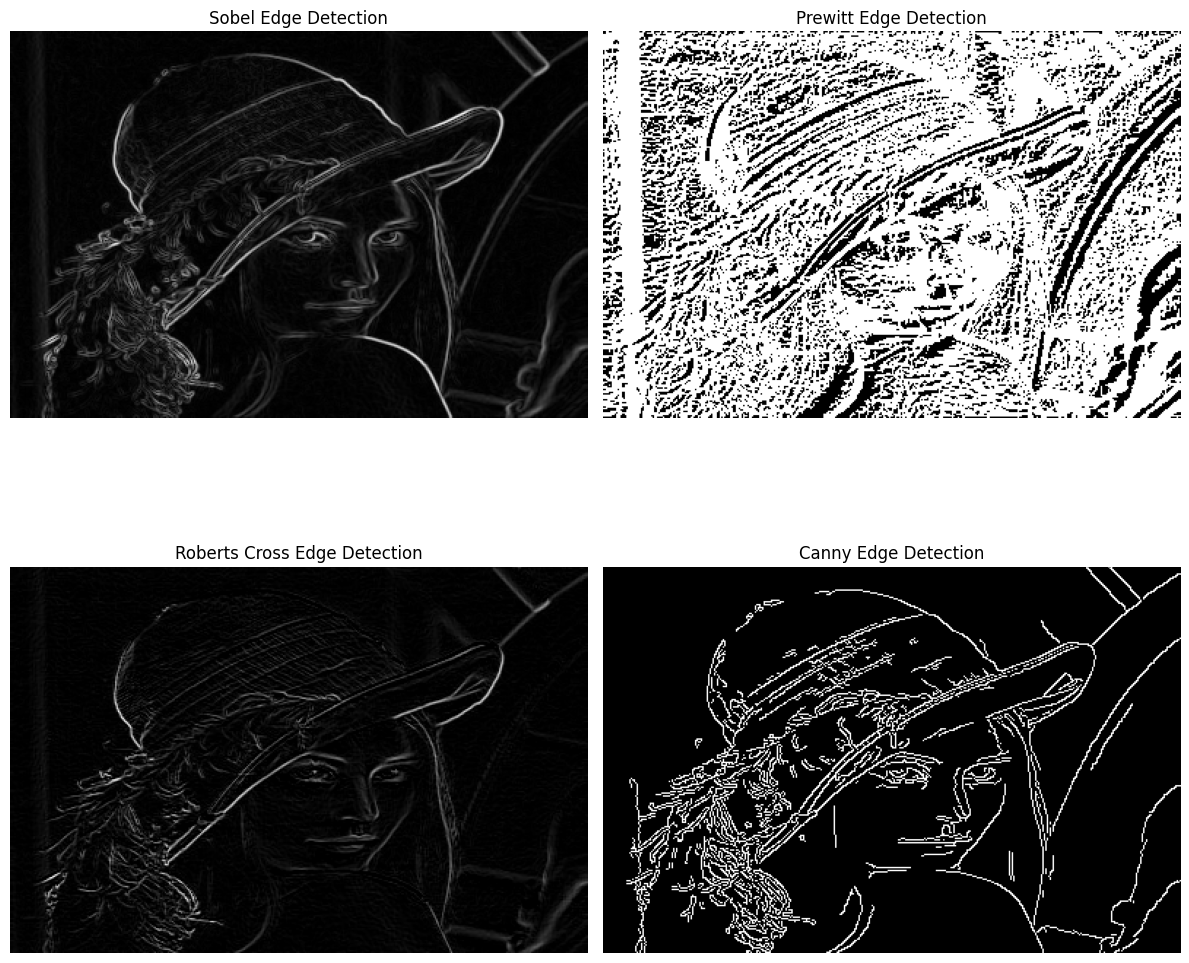

In [69]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

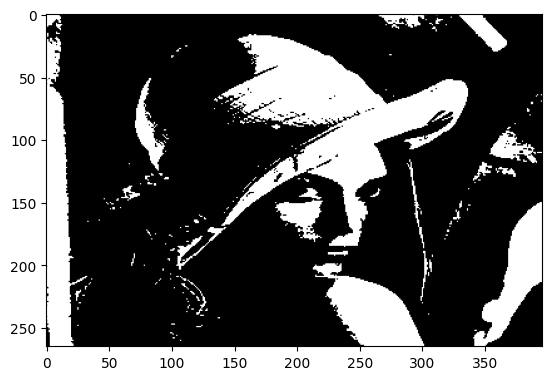

In [70]:
_, global_thresholded = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresholded)


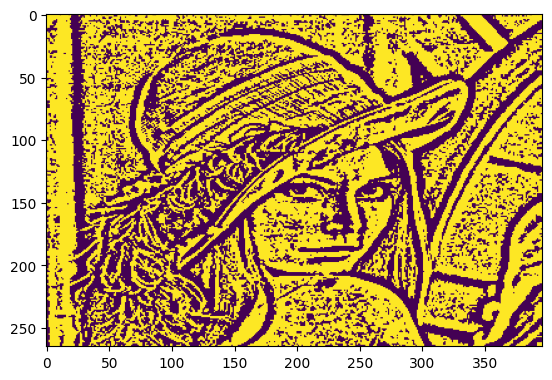

In [73]:
adaptive_thresholded1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresholded1)